#**Data investigation**

In [1]:
!wget https://raw.githubusercontent.com/bhavya-giri/retrieving-memes/refs/heads/main/data/raw_memes.json

--2025-01-09 11:25:43--  https://raw.githubusercontent.com/bhavya-giri/retrieving-memes/refs/heads/main/data/raw_memes.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4488944 (4.3M) [text/plain]
Saving to: ‘raw_memes.json’

raw_memes.json      100%[===================>]   4.28M  --.-KB/s    in 0.04s   

2025-01-09 11:25:44 (109 MB/s) - ‘raw_memes.json’ saved [4488944/4488944]



In [2]:
import pandas as pd

# Reading raw json file
df = pd.read_json("/content/raw_memes.json")
df.head()

,category,img_captions,meme_captions,title,url,img_fname,metaphors,post_id
0,memes,[Person in Spider Man outfit gives a lecture o...,[Meme poster is frustrated about the format of...,For real though,https://i.redd.it/m16dhaqyply21.jpg,memes_bpet7l.png,"[{'metaphor': 'Spider Man outfit', 'meaning': ...",bpet7l
1,memes,"[Two dogs carry a white flag, Identical chubby...",[Meme poster is saying that searching Google p...,And that's a fact,https://i.redd.it/z9oh7ligb0i31.jpg,memes_ctxvmu.png,"[{'metaphor': 'Two dogs', 'meaning': 'Meme pos...",ctxvmu
2,memes,"[man is very dissatisfied with what he sees, Q...",[Meme poster is feeling sad.],It was horrible,https://i.redd.it/yves3izsbsj31.jpg,memes_cxvuqd.png,"[{'metaphor': 'man', 'meaning': 'Meme poster'}...",cxvuqd
3,memes,[A man that is crying and a man that is laughi...,[Meme poster is saying that Reddit is more fun...,This is why Reddit is better,https://i.redd.it/y594n8exi6k31.jpg,memes_cyop7a.png,"[{'metaphor': 'A man', 'meaning': 'Meme poster...",cyop7a
4,memes,[a cop is chasing a thief with a shopping cart...,[Meme poster is making fun of the Area 51 raid.],The Area 51 raid is still happening right?,https://i.redd.it/4hrn18t4lck31.jpg,memes_cz2i20.png,"[{'metaphor': 'a cop', 'meaning': 'Meme poster...",cz2i20


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5823 entries, 0 to 5822
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category       5823 non-null   object
 1   img_captions   5823 non-null   object
 2   meme_captions  5823 non-null   object
 3   title          5818 non-null   object
 4   url            5823 non-null   object
 5   img_fname      5823 non-null   object
 6   metaphors      5822 non-null   object
 7   post_id        5823 non-null   object
dtypes: object(8)
memory usage: 364.1+ KB


In [4]:
df["img_captions"][0]


['Person in Spider Man outfit gives a lecture on stage.',
 'Person dressed as spider man stands in front of crowd with notes']

In [5]:
df["meme_captions"][3]


['Meme poster is saying that Reddit is more fun than Instagram.',
 'The person who wrote the post is saying people on Instagram are soft and reddit are funny.']

In [6]:
df["metaphors"][0]


[{'metaphor': 'Spider Man outfit', 'meaning': 'Meme poster'},
 {'metaphor': 'a lecture', 'meaning': 'complaint'},
 {'metaphor': 'spider man', 'meaning': 'Meme poster'},
 {'metaphor': 'crowd', 'meaning': 'meme readers'}]

In [7]:
len(df)


5823

##**Concat image and meme captions together**

In [8]:
df["img_captions_str"] = df['img_captions'].apply(lambda x: ', '.join(x))


In [9]:
df["img_captions_str"][0]


'Person in Spider Man outfit gives a lecture on stage., Person dressed as spider man stands in front of crowd with notes'

In [10]:
df["meme_captions_str"] = df['meme_captions'].apply(lambda x: ', '.join(x))
df["meme_captions_str"][3]

'Meme poster is saying that Reddit is more fun than Instagram., The person who wrote the post is saying people on Instagram are soft and reddit are funny.'

In [11]:
df["metaphors_str"] =  df['metaphors'].apply(lambda lst: ', '.join([f"{item['metaphor']}: {item['meaning']}" for item in lst]) if isinstance(lst, list) else '')
df["metaphors_str"][0]

'Spider Man outfit: Meme poster, a lecture: complaint, spider man: Meme poster, crowd: meme readers'

In [12]:
# Saving string_data.csv
df.to_csv("string_data.csv")

In [13]:
df.head()

,category,img_captions,meme_captions,title,url,img_fname,metaphors,post_id,img_captions_str,meme_captions_str,metaphors_str
0,memes,[Person in Spider Man outfit gives a lecture o...,[Meme poster is frustrated about the format of...,For real though,https://i.redd.it/m16dhaqyply21.jpg,memes_bpet7l.png,"[{'metaphor': 'Spider Man outfit', 'meaning': ...",bpet7l,Person in Spider Man outfit gives a lecture on...,Meme poster is frustrated about the format of ...,"Spider Man outfit: Meme poster, a lecture: com..."
1,memes,"[Two dogs carry a white flag, Identical chubby...",[Meme poster is saying that searching Google p...,And that's a fact,https://i.redd.it/z9oh7ligb0i31.jpg,memes_ctxvmu.png,"[{'metaphor': 'Two dogs', 'meaning': 'Meme pos...",ctxvmu,"Two dogs carry a white flag, Identical chubby ...",Meme poster is saying that searching Google pl...,"Two dogs: Meme poster, a white flag: PSA, carr..."
2,memes,"[man is very dissatisfied with what he sees, Q...",[Meme poster is feeling sad.],It was horrible,https://i.redd.it/yves3izsbsj31.jpg,memes_cxvuqd.png,"[{'metaphor': 'man', 'meaning': 'Meme poster'}...",cxvuqd,"man is very dissatisfied with what he sees, Qu...",Meme poster is feeling sad.,"man: Meme poster, sees: expressing different r..."
3,memes,[A man that is crying and a man that is laughi...,[Meme poster is saying that Reddit is more fun...,This is why Reddit is better,https://i.redd.it/y594n8exi6k31.jpg,memes_cyop7a.png,"[{'metaphor': 'A man', 'meaning': 'Meme poster...",cyop7a,A man that is crying and a man that is laughin...,Meme poster is saying that Reddit is more fun ...,"A man: Meme poster, a man: Meme poster, his go..."
4,memes,[a cop is chasing a thief with a shopping cart...,[Meme poster is making fun of the Area 51 raid.],The Area 51 raid is still happening right?,https://i.redd.it/4hrn18t4lck31.jpg,memes_cz2i20.png,"[{'metaphor': 'a cop', 'meaning': 'Meme poster...",cz2i20,"a cop is chasing a thief with a shopping cart,...",Meme poster is making fun of the Area 51 raid.,"a cop: Meme poster, a thief: not being bothere..."


##**Select useful columns**

In [14]:
columns = ["title","img_captions_str","meme_captions_str","metaphors_str","url"]
nlp_df = df[columns]

In [15]:
nlp_df.head()

,title,img_captions_str,meme_captions_str,metaphors_str,url
0,For real though,Person in Spider Man outfit gives a lecture on...,Meme poster is frustrated about the format of ...,"Spider Man outfit: Meme poster, a lecture: com...",https://i.redd.it/m16dhaqyply21.jpg
1,And that's a fact,"Two dogs carry a white flag, Identical chubby ...",Meme poster is saying that searching Google pl...,"Two dogs: Meme poster, a white flag: PSA, carr...",https://i.redd.it/z9oh7ligb0i31.jpg
2,It was horrible,"man is very dissatisfied with what he sees, Qu...",Meme poster is feeling sad.,"man: Meme poster, sees: expressing different r...",https://i.redd.it/yves3izsbsj31.jpg
3,This is why Reddit is better,A man that is crying and a man that is laughin...,Meme poster is saying that Reddit is more fun ...,"A man: Meme poster, a man: Meme poster, his go...",https://i.redd.it/y594n8exi6k31.jpg
4,The Area 51 raid is still happening right?,"a cop is chasing a thief with a shopping cart,...",Meme poster is making fun of the Area 51 raid.,"a cop: Meme poster, a thief: not being bothere...",https://i.redd.it/4hrn18t4lck31.jpg


In [16]:
nlp_df.to_csv("required_cols.csv")


##**Concat all text to be the input to the embedding model**

In [17]:
nlp_df["input"] = "TEXT: " + nlp_df["title"] + "; " + nlp_df["img_captions_str"] + "; " + nlp_df["meme_captions_str"] + "; " + nlp_df["metaphors_str"]


<ipython-input-17-c2e357fb21e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlp_df["input"] = "TEXT: " + nlp_df["title"] + "; " + nlp_df["img_captions_str"] + "; " + nlp_df["meme_captions_str"] + "; " + nlp_df["metaphors_str"]


In [18]:
nlp_df.head()

,title,img_captions_str,meme_captions_str,metaphors_str,url,input
0,For real though,Person in Spider Man outfit gives a lecture on...,Meme poster is frustrated about the format of ...,"Spider Man outfit: Meme poster, a lecture: com...",https://i.redd.it/m16dhaqyply21.jpg,TEXT: For real though; Person in Spider Man ou...
1,And that's a fact,"Two dogs carry a white flag, Identical chubby ...",Meme poster is saying that searching Google pl...,"Two dogs: Meme poster, a white flag: PSA, carr...",https://i.redd.it/z9oh7ligb0i31.jpg,TEXT: And that's a fact; Two dogs carry a whit...
2,It was horrible,"man is very dissatisfied with what he sees, Qu...",Meme poster is feeling sad.,"man: Meme poster, sees: expressing different r...",https://i.redd.it/yves3izsbsj31.jpg,TEXT: It was horrible; man is very dissatisfie...
3,This is why Reddit is better,A man that is crying and a man that is laughin...,Meme poster is saying that Reddit is more fun ...,"A man: Meme poster, a man: Meme poster, his go...",https://i.redd.it/y594n8exi6k31.jpg,TEXT: This is why Reddit is better; A man that...
4,The Area 51 raid is still happening right?,"a cop is chasing a thief with a shopping cart,...",Meme poster is making fun of the Area 51 raid.,"a cop: Meme poster, a thief: not being bothere...",https://i.redd.it/4hrn18t4lck31.jpg,TEXT: The Area 51 raid is still happening righ...


In [19]:
nlp_df["input"][0]


'TEXT: For real though; Person in Spider Man outfit gives a lecture on stage., Person dressed as spider man stands in front of crowd with notes; Meme poster is frustrated about the format of the website and is making a suggestion for improvement.; Spider Man outfit: Meme poster, a lecture: complaint, spider man: Meme poster, crowd: meme readers'

In [20]:
# Checking max input sequene
max(nlp_df['input'].str.len())

1064.0

<Axes: >

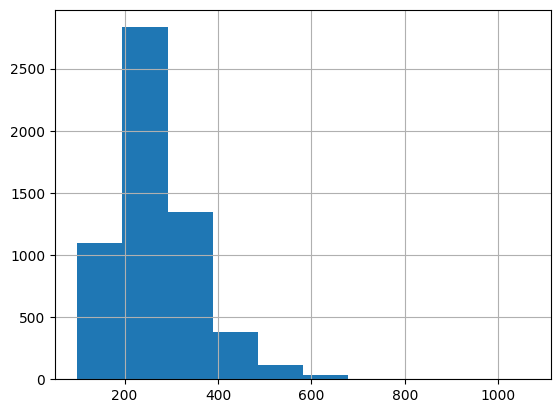

In [21]:
nlp_df["input"].str.len().hist()


In [22]:
nlp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5823 entries, 0 to 5822
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              5818 non-null   object
 1   img_captions_str   5823 non-null   object
 2   meme_captions_str  5823 non-null   object
 3   metaphors_str      5823 non-null   object
 4   url                5823 non-null   object
 5   input              5818 non-null   object
dtypes: object(6)
memory usage: 273.1+ KB


In [23]:
# Removing null row
nlp_df = nlp_df.dropna()

In [24]:
nlp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5818 entries, 0 to 5822
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              5818 non-null   object
 1   img_captions_str   5818 non-null   object
 2   meme_captions_str  5818 non-null   object
 3   metaphors_str      5818 non-null   object
 4   url                5818 non-null   object
 5   input              5818 non-null   object
dtypes: object(6)
memory usage: 318.2+ KB


In [25]:
# Adding ID column
nlp_df['id'] = range(0, len(nlp_df))

In [26]:
# Final Dataframe
columns = ["id","input","url"]
nlp_df = nlp_df[columns]

In [27]:
nlp_df.head()

,id,input,url
0,0,TEXT: For real though; Person in Spider Man ou...,https://i.redd.it/m16dhaqyply21.jpg
1,1,TEXT: And that's a fact; Two dogs carry a whit...,https://i.redd.it/z9oh7ligb0i31.jpg
2,2,TEXT: It was horrible; man is very dissatisfie...,https://i.redd.it/yves3izsbsj31.jpg
3,3,TEXT: This is why Reddit is better; A man that...,https://i.redd.it/y594n8exi6k31.jpg
4,4,TEXT: The Area 51 raid is still happening righ...,https://i.redd.it/4hrn18t4lck31.jpg


In [28]:
nlp_df.to_csv("input.csv")

#**Semantic Search**
Semantic Search is a search with meaning. The “meaning” here refers to understanding the searcher’s intent to retrieve the correct data

In [29]:
df = pd.read_csv("/content/input.csv")

In [30]:
df.head()

,Unnamed: 0,id,input,url
0,0,0,TEXT: For real though; Person in Spider Man ou...,https://i.redd.it/m16dhaqyply21.jpg
1,1,1,TEXT: And that's a fact; Two dogs carry a whit...,https://i.redd.it/z9oh7ligb0i31.jpg
2,2,2,TEXT: It was horrible; man is very dissatisfie...,https://i.redd.it/yves3izsbsj31.jpg
3,3,3,TEXT: This is why Reddit is better; A man that...,https://i.redd.it/y594n8exi6k31.jpg
4,4,4,TEXT: The Area 51 raid is still happening righ...,https://i.redd.it/4hrn18t4lck31.jpg


##**Packages**

In [31]:
import torch
from sentence_transformers import SentenceTransformer
import pickle

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [34]:
device

device(type='cuda')

In [33]:
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [35]:
# embed the input text to numerical representations
embeddings = model.encode(df["input"].to_list(), show_progress_bar=True)


Batches:   0%|          | 0/182 [00:00<?, ?it/s]

In [37]:
# Saving the embeddings
with open('meme-embeddings.pkl', "wb") as fOut:
    pickle.dump(embeddings, fOut)

In [38]:
print(f"Shape of one embedding{embeddings[0].shape}")


Shape of one embedding(768,)


#**Testing**

In [39]:
from sentence_transformers import util

prompt = "Spiderman giving lecture"
prompt_embedding = model.encode(prompt, convert_to_tensor=True)

matches = util.semantic_search(prompt_embedding,embeddings, top_k=5) # using cosine simarlity to compare embeddings
matches = pd.DataFrame(matches[0], columns=['corpus_id', 'score'])

In [40]:
matches

,corpus_id,score
0,5672,0.578827
1,0,0.511999
2,1368,0.511876
3,4412,0.481355
4,1603,0.474154


This code takes a set of document IDs (corpus_id) from a search result, filters a dataframe df to get the rows matching those IDs, and then extracts and returns a list of URLs associated with those filtered entries. The returned list (retrieved_memes) contains the URLs of the documents or media (e.g., memes) that were relevant to the search.

In [41]:
# Output memes
desired_ids = matches["corpus_id"]
filtered_df = df.loc[df['id'].isin(desired_ids)]
retrieved_memes = list(filtered_df["url"])
retrieved_memes

['https://i.redd.it/m16dhaqyply21.jpg',
 'https://i.redd.it/obobf6u1exx91.jpg',
 'https://i.redd.it/gmnwi9dxdfy91.jpg',
 'https://farm66.staticflickr.com/65535/52761820325_bc9f10f3c6.png',
 'https://i.redd.it/wm1nxjuehy3a1.jpg']

In [42]:
# Displaying the retrived  memes pics
from IPython.display import Image,display
[display(Image(url=x,width=200, height=200)) for x in retrieved_memes]

[None, None, None, None, None]

##**Putting all together**

In [51]:
# Function to retrive the memes
from IPython.display import Image,display

def retrive(query, embeddings):
  prompt_embedding = model.encode(query, convert_to_tensor=True)
  matches = util.semantic_search(prompt_embedding,embeddings, top_k=5) # using cosine simarlity to compare embeddings
  matches = pd.DataFrame(matches[0], columns=['corpus_id', 'score'])

  desired_ids = matches["corpus_id"]
  filtered_df = df.loc[df['id'].isin(desired_ids)]
  retrieved_memes = list(filtered_df["url"])

  [display(Image(url=x,width=200, height=200)) for x in retrieved_memes]


  return matches


In [52]:
df["input"][1368],df["input"][1603]

('TEXT: show some love; This image is a picture of spider man standing and smiling at something.; Meme poster is trying to convey that talking to your teachers about their day will give you good results; spider man: Teacher',
 "TEXT: I thought it was funny. Who can't afford $8?; A man lookin sideways, then second image is spiderman being spoked to by another person that appears to be mad; Meme poster is trying to convey that If you need something to add value to your life, you should examine why.; A man: Truth deliverer, spiderman: Truth seeker")

In [53]:
prompt = "Who can't afford $8 to get verfied?"
retrive(prompt,embeddings)

,corpus_id,score
0,4343,0.361201
1,5689,0.317069
2,1603,0.314016
3,563,0.295833
4,1069,0.275547


# References

"""
1. **Semantic Search with Sentence-Transformers**:  
   For a complete guide and examples of semantic search using Sentence-Transformers,
   visit the official documentation here:
   [Semantic Search Guide](https://www.sbert.net/examples/applications/semantic-search/README.html)

2. **all-mpnet-base-v2**:  
   This is a sentence-transformers model: It maps sentences & paragraphs to a 768 dimensional dense vector space and can be used for tasks like clustering or semantic search.
   You can find more information and download it from the Hugging Face model hub:
   [sentence-transformers/all-mpnet-base-v2all-mini-v2 on Hugging Face](https://https://huggingface.co/sentence-transformers/all-mpnet-base-v2)

3. Building Simple Semantic Search using Sentence Transformers blog post
[blog post](https://medium.com/@bhavyagiri/building-simple-semantic-search-using-sentence-transformers-48ba17bf9b01)

"""
